In [103]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.draw import polygon
from skimage.measure import find_contours
from skimage.morphology import thin
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

from ipywidgets import FloatProgress
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib notebook

In [113]:
%cd "C:\Users\User\Documents\pendrive\Sample interferograms"
interferogram_path = "s0920_17 355 nm end on interferometry (1).JPG"
interferogram = imread(interferogram_path)
interferogram = rgb2gray(interferogram)

C:\Users\User\Documents\pendrive\Sample interferograms


<IPython.core.display.Javascript object>


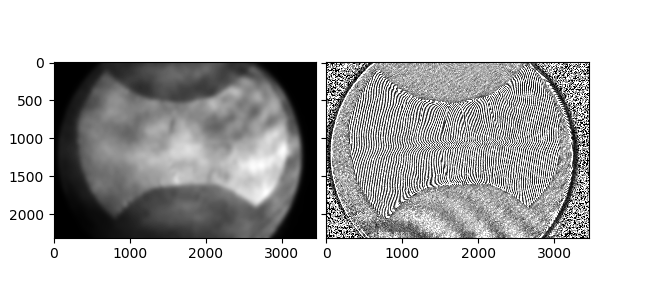

In [114]:
blur = 30
blurred_interferogram = gaussian(interferogram, blur)
normalised_interferogram = interferogram/blurred_interferogram
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(blurred_interferogram, cmap='gray')
ax[1].imshow(normalised_interferogram, cmap='gray', clim=[0,1.5])

In [115]:
contours = find_contours(normalised_interferogram>1, 0.5)

<IPython.core.display.Javascript object>


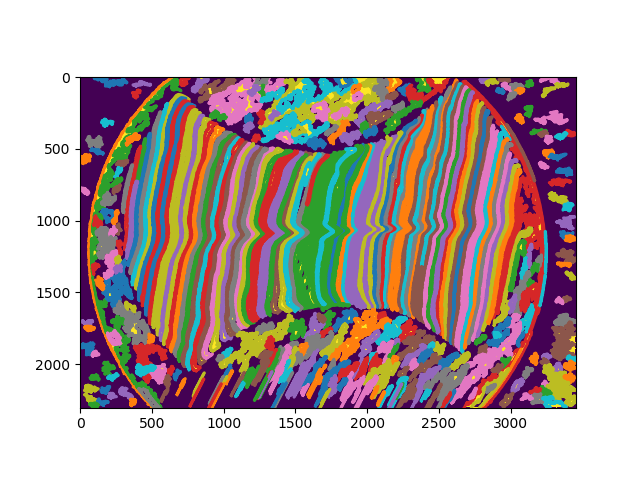

In [117]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(normalised_interferogram>1, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    if len(contour)>500:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
plt.show()

In [118]:
f = FloatProgress(min=0, max=len(contours)-1)
display(f)

smoothed_contours = []
painted_in = np.zeros_like(normalised_interferogram)
for n, contour in enumerate(contours):
    smoothed_contour = []
    length = len(contour)
    if length > 500:
        for i in range(length):
            smoothed_contour.append(np.mean(np.take(contour, range(i-10, i+10), mode='wrap', axis=0), axis=0).astype('int'))
        smoothed_contour = np.array(smoothed_contour)
        painted_in[smoothed_contour[:,0], smoothed_contour[:,1]] = 0.5
        smoothed_contours.append(smoothed_contour)
    f.value = n
smoothed_contours = np.array(smoothed_contours)

FloatProgress(value=0.0, max=61313.0)

In [119]:
painted_in = np.zeros_like(normalised_interferogram)
# f = FloatProgress(min=0, max=len(smoothed_contours))
f = FloatProgress(min=0, max=len(smoothed_contours)-1)

display(f)

for n, contour in enumerate(smoothed_contours):
    direction = 0
    for i in range(len(contour)):
        direction += (contour[i,1]-contour[i-1,1])*(contour[i,0]+contour[i-1,0])
    if direction > 0:
        colour = 0
    else:
        colour = 1
    painted_in[contour[:,0], contour[:,1]] = colour
    painted_in[polygon(contour[:,0],contour[:,1])] = colour
    f.value = n
#     if n == 9:
#         break

plt.imshow(painted_in)
# plt.plot(contour[:,1],contour[:,0])
plt.show()

FloatProgress(value=0.0, max=372.0)

In [120]:
thinned_interferogram2 = thin(painted_in, max_iter=1000)

<IPython.core.display.Javascript object>


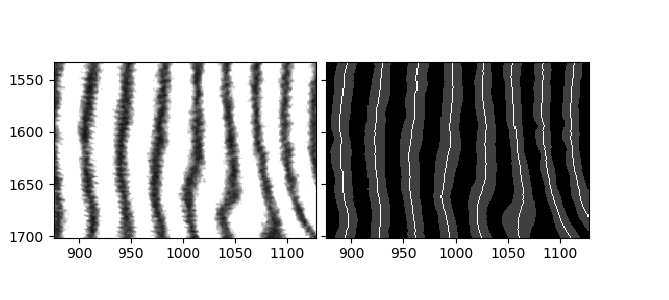

In [121]:
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(normalised_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow((painted_in)*1+thinned_interferogram2*3, cmap='gray')
# for n, contour in enumerate(contours):
#     if len(contour)>20:
#         ax[1].plot(contour[:, 1], contour[:, 0], linewidth=2)

In [77]:
imsave('test_ellie.png',thinned_interferogram2*255)

C:\Users\User\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: test_ellie.png is a low contrast image
  warn('%s is a low contrast image' % fname)
